In [1]:
from datasets import load_dataset, DownloadMode

# First, download the dataset with caching
def download_starcoderdata_ruby(save_directory, split="train", download_mode=DownloadMode.REUSE_DATASET_IF_EXISTS):
    try:
        ds = load_dataset(
            "bigcode/starcoderdata",
            data_dir="ruby",
            split=split,
            cache_dir=save_directory,
            download_mode=download_mode,
        )

        # Save the dataset properly for later reloading
        output_path = f"{save_directory}/ruby_{split}_dataset"
        ds.save_to_disk(output_path)

        print(f"Dataset 'bigcode/starcoderdata' (RUBY, {split}) successfully downloaded and saved to '{output_path}'.")
        return ds

    except Exception as e:
        print(f"Error downloading dataset 'bigcode/starcoderdata' (RUBY, {split}): {e}")
        return None

In [2]:
ds = download_starcoderdata_ruby(save_directory="./", split="train")

Generating train split: 0 examples [00:00, ? examples/s]

Saving the dataset (0/15 shards):   0%|          | 0/3390320 [00:00<?, ? examples/s]

Dataset 'bigcode/starcoderdata' (RUBY, train) successfully downloaded and saved to './/ruby_train_dataset'.


In [3]:
from datasets import load_from_disk

# Later, load the dataset from the saved location
dataset = load_from_disk("./ruby_train_dataset")

In [4]:
dataset

Dataset({
    features: ['max_stars_repo_path', 'max_stars_repo_name', 'max_stars_count', 'id', 'content'],
    num_rows: 3390320
})

In [5]:
type(dataset)

datasets.arrow_dataset.Dataset

In [6]:
print(dataset[0])

{'max_stars_repo_path': 'Formula/heartbeat.rb', 'max_stars_repo_name': 'ktakayama/homebrew-core', 'max_stars_count': 0, 'id': '0', 'content': 'class Heartbeat < Formula\n  desc "Lightweight Shipper for Uptime Monitoring"\n  homepage "https://www.elastic.co/beats/heartbeat"\n  url "https://github.com/elastic/beats.git",\n      tag:      "v7.14.2",\n      revision: "574c21d25ddb65a63665ac26b54799f81a7e9706"\n  license "Apache-2.0"\n  head "https://github.com/elastic/beats.git"\n\n  bottle do\n    sha256 cellar: :any_skip_relocation, arm64_big_sur: "7c714ce99c9a9ff1422c01230fc53510317a660c01cb266e330eeeb1847fd385"\n    sha256 cellar: :any_skip_relocation, big_sur:       "aa26dcdd586875f7cebd5fb8d5f59fb44d3f9dfa6aa44700fd22ce2d893ec874"\n    sha256 cellar: :any_skip_relocation, catalina:      "7558c0ac4f301a877b536cdb3045ec7f4a6ed48b23f5dd7d82c0fed3b4e37be8"\n    sha256 cellar: :any_skip_relocation, mojave:        "854ac7aca016e88045d4517a900a30d115866c8a04a4cfdecad1f3bbb09b9ef2"\n  end\n\

In [7]:
dataset = dataset.sort(column_names=["max_stars_count", "max_stars_repo_name"], reverse=[True, False])

In [8]:
# Print the first 10 examples
for i, example in enumerate(dataset):
    if i < 10:
        print(f"Example {i}:")
        print(example['content'])
        print("\n")
    else:
        break

Example 0:
<reponame>kalosisz/tensorflow
Pod::Spec.new do |s|
  s.name             = 'TensorFlowLiteSelectTfOps'
  s.version          = '2.6.0'
  s.authors          = 'Google Inc.'
  s.license          = { :type => 'Apache' }
  s.homepage         = 'https://github.com/tensorflow/tensorflow'
  s.source           = { :http => "https://dl.google.com/dl/cpdc/cb66bf4f8db100a3/TensorFlowLiteSelectTfOps-#{s.version}.tar.gz" }
  s.summary          = 'TensorFlow Lite Select TF Ops'
  s.description      = <<-DESC

  This pod can be used in addition to `TensorFlowLiteSwift` or
  `TensorFlowLiteObjC` pod, in order to enable Select TensorFlow ops. The
  resulting binary should also be force-loaded to the final app binary.
                       DESC

  s.ios.deployment_target = '9.0'

  s.module_name = 'TensorFlowLiteSelectTfOps'
  s.library = 'c++'
  s.vendored_frameworks = 'Frameworks/TensorFlowLiteSelectTfOps.framework'
  s.weak_frameworks = 'CoreML'
end



Example 1:
Pod::Spec.new do |s|
  s.na

In [9]:
from datasets import Dataset

def calculate_avg_line_length(example):
    lines = example['content'].split('\n')
    avg_length = sum(len(line) for line in lines) / len(lines)
    example['avg_line_length'] = avg_length
    return example

dataset = dataset.map(calculate_avg_line_length)

for i, example in enumerate(dataset):
    if i < 10:
        print(f"Example {i}:")
        print(example['content'])
        print(f"Average Line Length: {example['avg_line_length']}\n")
    else:
        break

Map:   0%|          | 0/3390320 [00:00<?, ? examples/s]

Example 0:
<reponame>kalosisz/tensorflow
Pod::Spec.new do |s|
  s.name             = 'TensorFlowLiteSelectTfOps'
  s.version          = '2.6.0'
  s.authors          = 'Google Inc.'
  s.license          = { :type => 'Apache' }
  s.homepage         = 'https://github.com/tensorflow/tensorflow'
  s.source           = { :http => "https://dl.google.com/dl/cpdc/cb66bf4f8db100a3/TensorFlowLiteSelectTfOps-#{s.version}.tar.gz" }
  s.summary          = 'TensorFlow Lite Select TF Ops'
  s.description      = <<-DESC

  This pod can be used in addition to `TensorFlowLiteSwift` or
  `TensorFlowLiteObjC` pod, in order to enable Select TensorFlow ops. The
  resulting binary should also be force-loaded to the final app binary.
                       DESC

  s.ios.deployment_target = '9.0'

  s.module_name = 'TensorFlowLiteSelectTfOps'
  s.library = 'c++'
  s.vendored_frameworks = 'Frameworks/TensorFlowLiteSelectTfOps.framework'
  s.weak_frameworks = 'CoreML'
end

Average Line Length: 38.541666666666664


In [10]:
sliced_dataset = dataset[:2500000]

In [11]:
import pandas as pd

df = pd.DataFrame(sliced_dataset)

In [12]:
avg_line_length_stats = df['avg_line_length'].describe()
print("Statistics for avg_line_length:")
print(avg_line_length_stats)

Statistics for avg_line_length:
count    2.500000e+06
mean     2.643390e+01
std      8.795530e+00
min      5.342466e-01
25%      2.058333e+01
50%      2.548000e+01
75%      3.101786e+01
max      1.225000e+02
Name: avg_line_length, dtype: float64


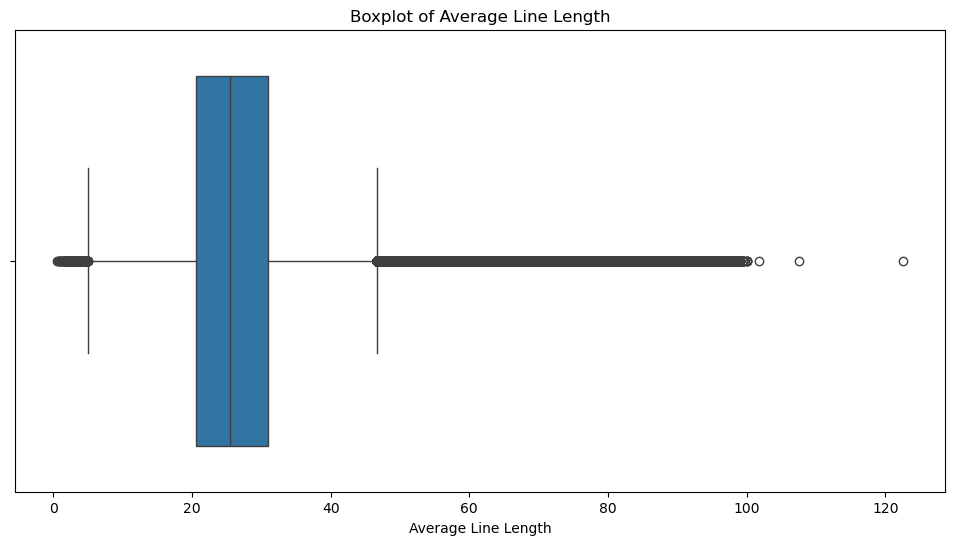

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['avg_line_length'])
plt.title('Boxplot of Average Line Length')
plt.xlabel('Average Line Length')
plt.show()

In [14]:
Q1 = df['avg_line_length'].quantile(0.25)
Q3 = df['avg_line_length'].quantile(0.75)
IQR = Q3 - Q1

In [15]:
outliers = df[(df['avg_line_length'] < (Q1 - 1.5 * IQR)) | (df['avg_line_length'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 60666


In [16]:
outliers['avg_line_length'].describe()

count    60666.000000
mean        55.289180
std         10.853982
min          0.534247
25%         48.906250
50%         52.400000
75%         59.122325
max        122.500000
Name: avg_line_length, dtype: float64

In [17]:
df.drop(outliers.index, inplace=True)

In [18]:
df['avg_line_length'].describe()

count    2.439334e+06
mean     2.571627e+01
std      7.425168e+00
min      4.933333e+00
25%      2.046154e+01
50%      2.525000e+01
75%      3.053333e+01
max      4.666906e+01
Name: avg_line_length, dtype: float64

In [19]:
import numpy as np

np.percentile(df['avg_line_length'], 80)

31.939393939393938

In [20]:
df['line_count'] = df['content'].apply(lambda x: len(x.split('\n')))
df['line_count'].describe()

count    2.439334e+06
mean     6.296522e+01
std      2.191032e+02
min      1.000000e+00
25%      1.400000e+01
50%      3.100000e+01
75%      6.600000e+01
max      1.200000e+05
Name: line_count, dtype: float64

In [21]:
count_range_dict = {
    "0-100": 0,
    "101-200": 0,
    "201-300": 0,
    "301-400": 0,
    "401-500": 0,
    "501-600": 0,
    "601-700": 0,
    "701-800": 0,
    "801-900": 0,
    "901-1000": 0,
    "1000+": 0
}

for count in df['line_count']:
    if count <= 100:
        count_range_dict["0-100"] += 1
    elif count <= 200:
        count_range_dict["101-200"] += 1
    elif count <= 300:
        count_range_dict["201-300"] += 1
    elif count <= 400:
        count_range_dict["301-400"] += 1
    elif count <= 500:
        count_range_dict["401-500"] += 1
    elif count <= 600:
        count_range_dict["501-600"] += 1
    elif count <= 700:
        count_range_dict["601-700"] += 1
    elif count <= 800:
        count_range_dict["701-800"] += 1
    elif count <= 900:
        count_range_dict["801-900"] += 1
    elif count <= 1000:
        count_range_dict["901-1000"] += 1
    else:
        count_range_dict["1000+"] += 1

In [22]:
for key, value in count_range_dict.items():
    print(f"Number of examples with line count in range {key}: {value}")

Number of examples with line count in range 0-100: 2077778
Number of examples with line count in range 101-200: 236380
Number of examples with line count in range 201-300: 64067
Number of examples with line count in range 301-400: 25460
Number of examples with line count in range 401-500: 12534
Number of examples with line count in range 501-600: 7023
Number of examples with line count in range 601-700: 4247
Number of examples with line count in range 701-800: 2738
Number of examples with line count in range 801-900: 1905
Number of examples with line count in range 901-1000: 1322
Number of examples with line count in range 1000+: 5880


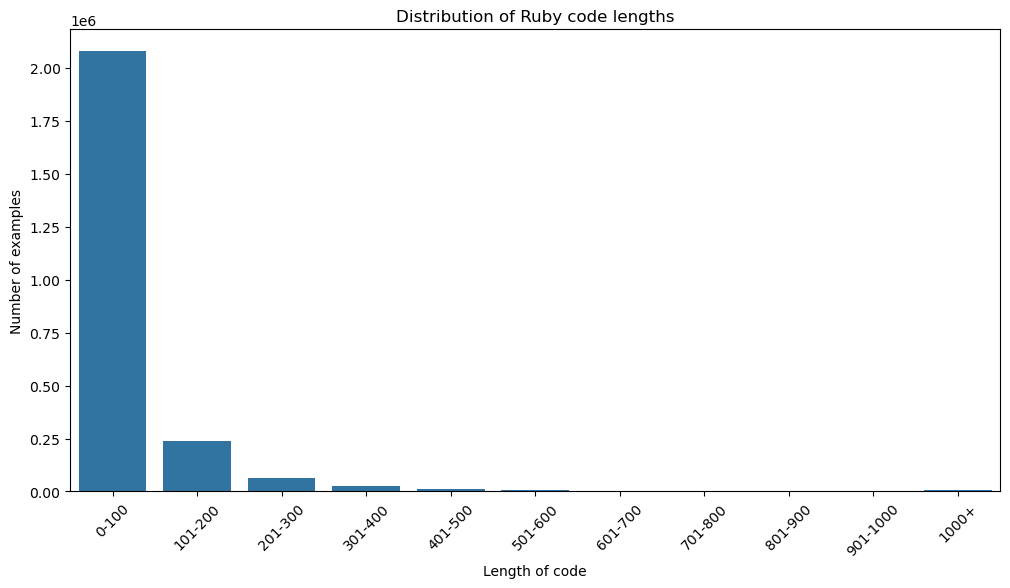

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=list(count_range_dict.keys()), y=list(count_range_dict.values()))
plt.title("Distribution of Ruby code lengths")
plt.xlabel("Length of code")
plt.ylabel("Number of examples")
plt.xticks(rotation=45)
plt.show()

In [25]:
df_line = pd.DataFrame(list(count_range_dict.items()), columns=["Length", "Count"])
df_line["Cumulative Count"] = df_line["Count"].cumsum()
df_line["Percentage"] = df_line["Count"] / df_line["Count"].sum() * 100
df_line["Cumulative Percentage"] = df_line["Percentage"].cumsum()
df_line.head(11)

,Length,Count,Cumulative Count,Percentage,Cumulative Percentage
0,0-100,2077778,2077778,85.178085,85.178085
1,101-200,236380,2314158,9.690350,94.868435
2,201-300,64067,2378225,2.626414,97.494849
3,301-400,25460,2403685,1.043728,98.538577
4,401-500,12534,2416219,0.513829,99.052405
5,501-600,7023,2423242,0.287906,99.340312
6,601-700,4247,2427489,0.174105,99.514417
7,701-800,2738,2430227,0.112244,99.626660
8,801-900,1905,2432132,0.078095,99.704755
9,901-1000,1322,2433454,0.054195,99.758951


In [29]:
np.percentile(df['line_count'], 90)

132.0

In [26]:
df.columns

Index(['max_stars_repo_path', 'max_stars_repo_name', 'max_stars_count', 'id',
       'content', 'avg_line_length', 'line_count'],
      dtype='object')

In [27]:
df_filtered = df.drop(columns=['max_stars_repo_path', 'max_stars_repo_name', 'max_stars_count', 'id'], axis=1)
df_filtered.head()

,content,avg_line_length,line_count
0,<reponame>kalosisz/tensorflow\nPod::Spec.new d...,38.541667,24
1,Pod::Spec.new do |s|\n s.name = '...,30.348315,89
2,# encoding: utf-8\n# Code generated by Microso...,36.043478,46
3,<gh_stars>1000+\n#!/usr/bin/env ruby\nrequire ...,20.510204,98
4,<filename>ios/LibTorch-Lite.podspec\nPod::Spec...,41.500000,38


In [28]:
df_filtered.shape

(2439334, 3)

In [30]:
df_filtered = df_filtered[df_filtered['line_count'] <= 150]
df_filtered.shape

(2239793, 3)

In [31]:
df_filtered = df_filtered[df_filtered['avg_line_length'] <= 32]
df_filtered.shape

(1840339, 3)

In [32]:
df_filtered.head()

,content,avg_line_length,line_count
1,Pod::Spec.new do |s|\n s.name = '...,30.348315,89
3,<gh_stars>1000+\n#!/usr/bin/env ruby\nrequire ...,20.510204,98
6,<reponame>nicchagil/spring-framework\nrequire ...,26.047619,21
9,<filename>lib/plugins/create/templates/aws-rub...,18.769231,13
10,<reponame>ajesse11x/serverless\n\n # Implement...,23.866667,15


In [33]:
print(df[["avg_line_length", "line_count"]].describe())
print()
print(df_filtered.describe())

       avg_line_length    line_count
count     2.439334e+06  2.439334e+06
mean      2.571627e+01  6.296522e+01
std       7.425168e+00  2.191032e+02
min       4.933333e+00  1.000000e+00
25%       2.046154e+01  1.400000e+01
50%       2.525000e+01  3.100000e+01
75%       3.053333e+01  6.600000e+01
max       4.666906e+01  1.200000e+05

       avg_line_length    line_count
count     1.840339e+06  1.840339e+06
mean      2.276857e+01  3.623853e+01
std       5.303889e+00  3.186361e+01
min       4.933333e+00  1.000000e+00
25%       1.912000e+01  1.200000e+01
50%       2.311268e+01  2.500000e+01
75%       2.693182e+01  5.000000e+01
max       3.200000e+01  1.500000e+02


In [34]:
data_dict_ruby = {}

for i, example in enumerate(df_filtered["content"]):
    data_dict_ruby[f"ruby_{i}"] = example

In [35]:
assert len(data_dict_ruby) == len(df_filtered), "Data dictionary length does not match the number of examples in the dataset."

In [36]:
for i, (k,v) in enumerate(data_dict_ruby.items()):
    if i < 5:
        print(f"Example {k}:")
        print(v)
        print("\n")
    else:
        break

Example ruby_0:
Pod::Spec.new do |s|
  s.name             = 'TensorFlowLiteObjC'
  s.version          = '2.6.0'
  s.authors          = 'Google Inc.'
  s.license          = { :type => 'Apache' }
  s.homepage         = 'https://github.com/tensorflow/tensorflow'
  s.source           = { :git => 'https://github.com/tensorflow/tensorflow.git', :tag => "v#{s.version}" }
  s.summary          = 'TensorFlow Lite for Objective-C'
  s.description      = <<-DESC

  TensorFlow Lite is TensorFlow's lightweight solution for Objective-C
  developers. It enables low-latency inference of on-device machine learning
  models with a small binary size and fast performance supporting hardware
  acceleration.
                       DESC

  s.ios.deployment_target = '9.0'

  s.module_name = 'TFLTensorFlowLite'
  s.static_framework = true

  tfl_dir = 'tensorflow/lite/'
  objc_dir = tfl_dir + 'objc/'

  s.pod_target_xcconfig = {
    'HEADER_SEARCH_PATHS' =>
      '"${PODS_TARGET_SRCROOT}" ' +
      '"${PODS_TAR

In [37]:
import json

with open('ruby_train.json', 'w') as f:
    json.dump(data_dict_ruby, f)
    print("Saved to 'ruby_train.json'")

Saved to 'ruby_train.json'
